## Der Kluge reist auf der Sparschiene 
Die SBB bieten mehr Sparbilette denn je an. In den letzten Monaten wurden die Ticketpreise, wie sie via den Fahrplan ersichtlich sind, von einem Computerskript automatisiert ausgelesen. Die Daten wurden anschliessend aufbereitet. In diesem Notebook werden sie mit der Skriptsprache Python und der Datenerweiterung Pandas ausgewertet.

In [1]:
# Importieren der nötigen Bibliotheken. 
import pandas as pd
from progressbar import progressbar
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# Die aufbereiteten Daten werden geladen. 
df = pd.read_csv('daten/sparbillette.csv', index_col='Unnamed: 0', parse_dates=['datetime', 'datum'])

In [3]:
# Ein erster Blick auf die Tabelle (Auszug)
df.head()

,datetime,datum,start,ziel,zeit,abfahrt,ankunft,dauer,umsteigen,belegung_1,...,file,im_voraus,im_voraus_kat,abfahrt_datetime,strecke,normalpreis,preis_prozent,sparticket,kilometer,kilometerpreis
0,2019-10-24 22:49:45,2019-10-25,Bern,"Lugano, Vignola",16:00,16:02,19:43,3 h 41 min,3,"1. Klasse, Sehr hohe Belegung erwartet",...,Bern -Zürich HB_2019-10-24 22:49:45.242979_25....,-1,-1,2019-10-25 16:02:00,"Bern -- Lugano, Vignola",54.0,100.0,False,NaN,NaN
1,2019-10-24 22:49:45,2019-10-25,Bern,"Lugano, Vignola",16:00,16:10,20:21,4 h 11 min,3,"1. Klasse, Hohe Belegung erwartet",...,Bern -Zürich HB_2019-10-24 22:49:45.242979_25....,-1,-1,2019-10-25 16:10:00,"Bern -- Lugano, Vignola",54.0,100.0,False,NaN,NaN
2,2019-10-24 22:49:45,2019-10-25,Bern,"Lugano, Vignola",16:00,17:00,20:51,3 h 51 min,3,"1. Klasse, Sehr hohe Belegung erwartet",...,Bern -Zürich HB_2019-10-24 22:49:45.242979_25....,-1,-1,2019-10-25 17:00:00,"Bern -- Lugano, Vignola",54.0,88.9,True,NaN,NaN
3,2019-10-24 22:49:45,2019-10-25,Bern,"Lugano, Vignola",16:00,18:02,21:51,3 h 49 min,3,"1. Klasse, Hohe Belegung erwartet",...,Bern -Zürich HB_2019-10-24 22:49:45.242979_25....,-1,-1,2019-10-25 18:02:00,"Bern -- Lugano, Vignola",54.0,100.0,False,NaN,NaN
4,2019-10-24 22:49:45,2019-10-25,Bern,"Lugano, Vignola",16:00,19:00,22:51,3 h 51 min,3,"1. Klasse, Tiefe bis mittlere Belegung erwartet",...,Bern -Zürich HB_2019-10-24 22:49:45.242979_25....,-1,-1,2019-10-25 19:00:00,"Bern -- Lugano, Vignola",54.0,88.9,True,NaN,NaN


In [4]:
# Wie viele Einträge sind vorhanden? 
len(df)

182817

In [5]:
# Wie viele Verbindungen sind enthalten? (Da die einzelnen Verbindungen im Laufe der Zeit mehrfach gescrapt werden, 
# ist diese Zahl tiefer.)
len(df.drop_duplicates(subset=['datum', 'start', 'ziel', 'zeit', 'abfahrt', 'ankunft', 'dauer', 'umsteigen']))

120182

In [6]:
# Wann wurde zum ersten Mal gescrapt?
df['datetime'].min()

Timestamp('2019-09-11 14:57:54')

In [7]:
# Wann wurde zum letzten Mal gescrapt?
df['datetime'].max()

Timestamp('2019-11-24 00:06:40')

In [8]:
# Welches ist der erste erfasste Fahrtag?
df['datum'].min()

Timestamp('2019-09-12 00:00:00')

In [9]:
# Welches ist der letzte erfasste Fahrtag?
df['datum'].max()

Timestamp('2020-01-20 00:00:00')

In [10]:
# Welche Strecken wurden wie oft ausgelesen? Angezeigt werden die 20 wichtigsten. 
df['strecke'].value_counts().head(20)

Bern -- Zürich HB                  12909
Basel SBB -- Zürich HB              8894
Zürich HB -- Bern                   8014
Genève -- Zürich HB                 7298
Chur -- Zürich HB                   7100
Bern -- Genève                      6409
Baden -- Zürich HB                  6197
Zürich HB -- Basel SBB              5969
Zürich HB -- Genève                 5939
Bern -- Basel SBB                   5650
Thun -- Bern                        5178
Lugano -- Zürich HB                 4904
Bern -- Thun                        4746
Genève -- Bern                      4584
Basel SBB -- Bern                   4409
Bern -- Biel/Bienne                 4052
Zürich HB -- Berneck, Rosenberg     3987
Domodossola, Stazione -- Bern       3755
Zürich HB -- Chur                   3445
Genève -- Berneck, Rosenberg        2963
Name: strecke, dtype: int64

In [11]:
# Welche Start-Adressen sind verzeichnet? 
df['start'].unique().tolist()

['Bern',
 'Zürich HB',
 'Genève',
 'Winterthur, Turmstrasse',
 'Baden',
 'Basel SBB',
 'Winterthur, Hauptbahnhof',
 'Chur',
 'Thun',
 'Lugano',
 'Domodossola, Stazione',
 'Biel/Bienne']

In [12]:
# Welche Ziel-Adressen sind verzeichnet?
df['ziel'].unique().tolist()

['Lugano, Vignola',
 'Bern',
 'Zürich HB',
 'Basel SBB',
 'Biel/Bienne',
 'Bern, Wankdorf Center',
 'Genève',
 'Lugano',
 'Bern Flughafen',
 'Berneck, Rosenberg',
 'Zürich, Hallenbad Oerlikon',
 'Domodossola, Stazione',
 'Bern, Inselplatz',
 'Bern Brünnen Westside, Bahnhof',
 'Thun',
 'Oberwinterthur',
 'Bern Marzili',
 'Biel/Bienne, Bellevue',
 'Zürich, Berninaplatz',
 'Bern, Galgenfeld',
 'Basel, Züribieter (Restaurant)',
 'Chur',
 'Winterthur, Hauptbahnhof',
 'Winterthur, Hinterwiesli',
 'Basel, Bernerring',
 'Bern, Pfisternbeck (Restaurant)',
 'Thun, Untere Wart',
 'Zürich, Churchill',
 'Baden',
 'Zürich, SBB-Werkstätte',
 'Bern Brünnen Westside',
 'Bern, Bierhübeli',
 'Bern Bümpliz',
 'Zürich, Haldenbach',
 'Zürich, Bernoulli-Häuser',
 'Zürich, Albisriederplatz',
 'Zürich, Apotheke im Hauptbahnhof',
 'Zürich Wipkingen',
 'Winterthur, Turmstrasse',
 'Genf, Churchill (Hotel)',
 'Zürich, Kirche Fluntern',
 'Winterthur, Rosenberg',
 'Zürich, Zwielplatz',
 'Biel/Bienne, Bubenbergstrass

In [13]:
# Für wieviel Prozent aller Verbindungen wurden (zwei Monate im Voraus) Sparangebote ausgeschrieben? 
df_temp = df[df['im_voraus_kat'] == -58]
#df_temp = df_temp[(df_temp['start'] == 'Domodossola, Stazione') & (df_temp['ziel'] == 'Bern')]
df_temp = df_temp.drop_duplicates(subset=['datum', 'start', 'ziel', 'zeit', 'abfahrt', 'ankunft', 'dauer', 'umsteigen'])
100 * len(df_temp[df_temp['sparticket'] == True]) / len(df_temp)

64.76743706999547

In [14]:
# Enthalten sind darin mitunter unbequeme Verbindungen. Wie sieht es bei den Direktverbindungen aus?
df_temp = df_temp[df_temp['umsteigen'] == 0]
100 * len(df_temp[df_temp['sparticket'] == True]) / len(df_temp)

54.90726139520913

In [15]:
# Übersicht über die Strecken, für die genügend Daten vorliegen, sowie über die verzeichneten Ticketpreise.
# Berücksichtigt werden ausschliesslich Direktverbindungen ohne Umsteigen. 
df_strecken = df[df['umsteigen'] == 0].drop_duplicates(subset=['datetime', 'datum', 'start', 'ziel', 'zeit', 'abfahrt', 'ankunft', 'dauer', 'umsteigen']).groupby('strecke')[['datetime']].count().sort_values(by='datetime', ascending=False)
df_strecken.columns = ['tickets']
df_strecken = df_strecken[df_strecken['tickets'] > 1500]

for i, r in df_strecken.iterrows():
    df_strecken.at[i, 'min_preis'] = df[(df['strecke'] == i) & (df['umsteigen'] == 0)]['minimalpreis'].min()
    df_strecken.at[i, 'max_preis'] = df[(df['strecke'] == i) & (df['umsteigen'] == 0)]['minimalpreis'].max()
    df_strecken.at[i, 'mean_preis'] = df[(df['strecke'] == i) & (df['umsteigen'] == 0)]['minimalpreis'].mean()
    df_strecken.at[i, 'normalpreis'] = df[(df['strecke'] == i) & (df['umsteigen'] == 0)]['normalpreis'].iloc[0]
    
    for t in [-58, -30, -7, -3, -1]:
        df_strecken.at[i, 'mean_' + str(abs(t)) + '_tage'] = df[(df['strecke'] == i) & (df['im_voraus_kat'] == t) & (df['umsteigen'] == 0)]['minimalpreis'].mean()

    df_strecken.at[i, 'prozent_sparticket'] = 100 * len(df[(df['strecke'] == i) & (df['umsteigen'] == 0) & (df['sparticket'] == True)]) / len(df[(df['strecke'] == i) & (df['umsteigen'] == 0)])
    for t in [-58, -30, -7, -3, -1]:
        anz_tickets = len(df[(df['strecke'] == i) & (df['im_voraus_kat'] == t) & (df['umsteigen'] == 0)])
        anz_spartickets = len(df[(df['strecke'] == i) & (df['im_voraus_kat'] == t) & (df['umsteigen'] == 0) & (df['sparticket'] == True)])
        df_strecken.at[i, 'prozent_sparticket_' + str(abs(t)) + '_tage'] = 100 * anz_spartickets / anz_tickets
        
df_strecken.to_csv('output/strecken.csv')
df_strecken.sort_index()

,tickets,min_preis,max_preis,mean_preis,normalpreis,mean_58_tage,mean_30_tage,mean_7_tage,mean_3_tage,mean_1_tage,prozent_sparticket,prozent_sparticket_58_tage,prozent_sparticket_30_tage,prozent_sparticket_7_tage,prozent_sparticket_3_tage,prozent_sparticket_1_tage
strecke,,,,,,,,,,,,,,,,
Baden -- Zürich HB,6145,6.7,6.7,6.700000,6.7,6.700000,6.700000,6.700000,6.700000,6.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Basel SBB -- Bern,2318,6.2,20.5,11.994996,20.5,10.976567,11.515223,12.284392,12.382398,13.013299,69.628991,74.931880,71.391076,67.460317,67.602041,66.240409
Basel SBB -- Zürich HB,7821,5.2,17.0,8.843434,17.0,8.106250,8.686612,8.644359,9.530655,9.624268,82.956144,85.918675,83.320868,83.230294,80.577223,79.969183
Bern -- Basel SBB,3188,6.2,20.5,12.407528,20.5,11.475522,12.471834,12.214742,12.812155,13.474375,68.569636,73.434535,65.973535,70.337478,67.955801,63.125000
Bern -- Biel/Bienne,4052,9.2,9.2,9.200000,9.2,9.200000,9.200000,9.200000,9.200000,9.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bern -- Genève,3991,7.8,25.5,13.594513,25.5,12.084659,12.835286,13.137291,14.606787,16.354355,87.346530,93.750000,87.847731,86.910198,85.671192,81.451613
Bern -- Thun,4718,2.6,9.2,6.928487,8.2,9.200000,6.390012,6.580653,6.443434,6.696815,28.401865,0.000000,36.704120,32.889964,36.237374,26.878981
Bern -- Zürich HB,8514,7.8,25.5,18.175981,25.5,17.121318,17.727405,18.175071,18.454419,19.421919,50.375852,55.680224,51.072664,48.500000,50.591510,47.689076
Biel/Bienne -- Bern,2007,9.2,9.2,9.200000,9.2,9.200000,9.200000,9.200000,9.200000,9.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
# Exportieren der Daten für Datawrapper. 
df_temp = df_strecken[df_strecken['tickets'] > 1000]
df_temp = df_temp[['min_preis', 'max_preis', 'normalpreis', 'mean_preis', 'prozent_sparticket', 'mean_58_tage', 'mean_30_tage', 'mean_7_tage', 'mean_3_tage', 'mean_1_tage']]
df_temp = df_temp.sort_index()
df_temp['prozent_sparticket'] = df_temp['prozent_sparticket'].apply(lambda x: int(round(x)))

# Einige Korrekturen. Der Maximalpreis muss nicht zwingend der Normalpreis sein. 
df_temp.at['Bern -- Thun', 'normalpreis'] = 8.20
df_temp.at['Thun -- Bern', 'normalpreis'] = 8.20
df_temp.at['Zürich HB -- Chur', 'normalpreis'] = 20.50
df_temp.at['Chur -- Zürich HB', 'normalpreis'] = 20.50

df_temp.index = [x.replace('--', '–').replace(', Stazione', '').replace(', Hauptbahnhof', '') for x in df_temp.index]
df_temp['durchschnittspreis_prozent'] = 100 * df_temp['mean_preis'] / df_temp['normalpreis']
df_temp['mean_preis'] = [round(x * 20) / 20 for x in df_temp['mean_preis']]
df_temp['sparpotenzial'] = 100 - df_temp['durchschnittspreis_prozent']
df_temp['sparpotenzial'] = df_temp['sparpotenzial'].apply(lambda x: int(round(x)))
df_temp = df_temp[df_temp['sparpotenzial'] > 0]
df_temp[['mean_58_tage', 'mean_30_tage', 'mean_7_tage', 'mean_3_tage', 'mean_1_tage']].sort_index()

,mean_58_tage,mean_30_tage,mean_7_tage,mean_3_tage,mean_1_tage
Basel SBB – Bern,10.976567,11.515223,12.284392,12.382398,13.013299
Basel SBB – Zürich HB,8.106250,8.686612,8.644359,9.530655,9.624268
Bern – Basel SBB,11.475522,12.471834,12.214742,12.812155,13.474375
Bern – Genève,12.084659,12.835286,13.137291,14.606787,16.354355
Bern – Thun,9.200000,6.390012,6.580653,6.443434,6.696815
Bern – Zürich HB,17.121318,17.727405,18.175071,18.454419,19.421919
Chur – Zürich HB,10.850497,10.924942,11.852356,12.077225,12.639187
Domodossola – Bern,29.534182,26.126389,26.581935,28.176898,29.357460
Genève – Bern,10.202217,12.078013,11.925877,12.341575,14.428538
Genève – Zürich HB,22.264401,23.468972,25.756974,26.586705,28.119417


In [17]:
# Bei wieviel Prozent der erfassten Tickets handelt es sich um Spartickets? 
df_strecken['prozent_sparticket'].sort_values(ascending=True)

strecke
Biel/Bienne -- Bern                       0.000000
Baden -- Zürich HB                        0.000000
Zürich HB -- Winterthur, Hauptbahnhof     0.000000
Winterthur, Hauptbahnhof -- Zürich HB     0.000000
Bern -- Biel/Bienne                       0.000000
Thun -- Bern                             22.691858
Bern -- Thun                             28.401865
Domodossola, Stazione -- Bern            49.721913
Bern -- Zürich HB                        50.375852
Zürich HB -- Lugano                      58.586526
Zürich HB -- Bern                        60.281195
Bern -- Basel SBB                        68.569636
Basel SBB -- Bern                        69.628991
Zürich HB -- Basel SBB                   74.972757
Lugano -- Zürich HB                      76.611069
Zürich HB -- Biel/Bienne                 78.643068
Zürich HB -- Chur                        82.589483
Basel SBB -- Zürich HB                   82.956144
Chur -- Zürich HB                        85.758578
Bern -- Genève         

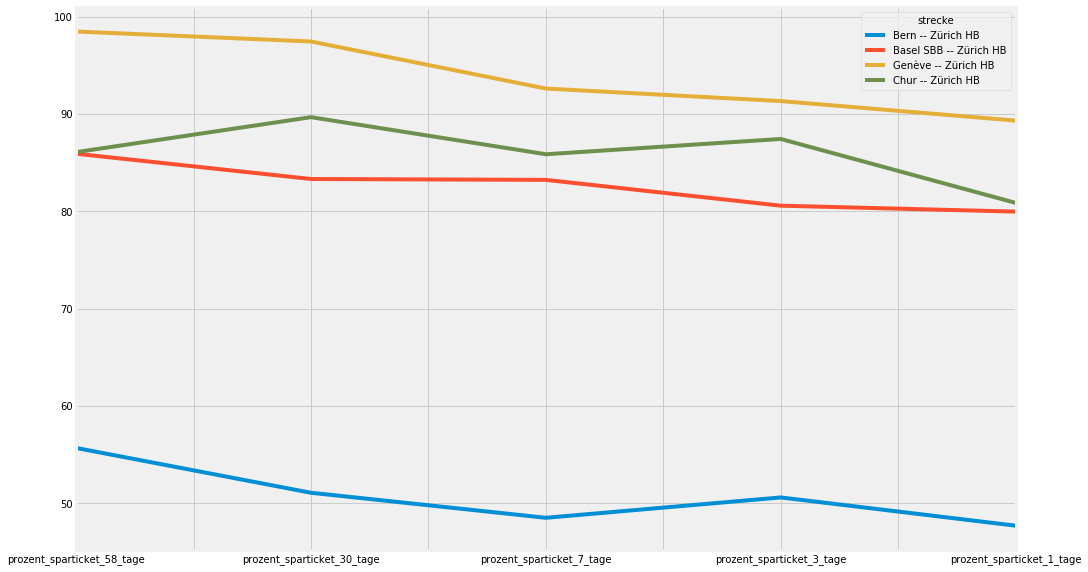

In [18]:
# Bei wievielen der erfassten Tickets handelt es sich um Spartickets?
v = ['Bern -- Zürich HB', 'Basel SBB -- Zürich HB', 'Genève -- Zürich HB', 'Chur -- Zürich HB']

fig, ax = plt.subplots(figsize=[15,10])
df_strecken.loc[v][[x for x in df_strecken.columns if 'prozent_sparticket_' in x]].transpose().plot(kind='line', ax=ax)

In [19]:
# Welches sind die teuersten Tickets?
df[df['minimalpreis'] == df['minimalpreis'].max()]

,datetime,datum,start,ziel,zeit,abfahrt,ankunft,dauer,umsteigen,belegung_1,...,file,im_voraus,im_voraus_kat,abfahrt_datetime,strecke,normalpreis,preis_prozent,sparticket,kilometer,kilometerpreis
181046,2019-10-24 12:12:22,2019-11-07,Genève,"Lugano, Vignola",16:00,06:12,11:43,5 h 31 min,3,"1. Klasse, Tiefe bis mittlere Belegung erwartet",...,Genf-Zürich HB_2019-10-24 12:12:22.816296_07.1...,-14,-14,2019-11-07 06:12:00,"Genève -- Lugano, Vignola",70.0,100.0,False,NaN,NaN
181109,2019-10-24 12:26:39,2019-10-31,Genève,"Lugano, Vignola",16:00,06:12,11:50,5 h 38 min,3,"1. Klasse, Tiefe bis mittlere Belegung erwartet",...,Genf-Zürich HB_2019-10-24 12:26:39.322444_31.1...,-7,-7,2019-10-31 06:12:00,"Genève -- Lugano, Vignola",70.0,100.0,False,NaN,NaN
181122,2019-10-24 12:12:22,2019-11-07,Genève,"Lugano, Vignola",16:00,04:51,10:43,5 h 52 min,4,"1. Klasse, Tiefe bis mittlere Belegung erwartet",...,Genf-Zürich HB_2019-10-24 12:12:22.816296_07.1...,-14,-14,2019-11-07 04:51:00,"Genève -- Lugano, Vignola",70.0,100.0,False,NaN,NaN
181131,2019-10-24 12:15:55,2019-10-25,Genève,"Lugano, Vignola",16:00,22:43,08:57,10 h 14 min,4,"1. Klasse, Tiefe bis mittlere Belegung erwartet",...,Genf-Zürich HB_2019-10-24 12:15:55.053950_25.1...,-1,-1,2019-10-25 22:43:00,"Genève -- Lugano, Vignola",70.0,100.0,False,NaN,NaN
181132,2019-10-24 12:15:55,2019-10-25,Genève,"Lugano, Vignola",16:00,04:51,10:57,6 h 6 min,4,"1. Klasse, Hohe Belegung erwartet",...,Genf-Zürich HB_2019-10-24 12:15:55.053950_25.1...,-1,-1,2019-10-25 04:51:00,"Genève -- Lugano, Vignola",70.0,100.0,False,NaN,NaN
181138,2019-10-24 12:22:57,2019-11-23,Genève,"Lugano, Vignola",16:00,22:48,08:50,10 h 2 min,4,NaN,...,Genf-Zürich HB_2019-10-24 12:22:57.379109_23.1...,-30,-30,2019-11-23 22:48:00,"Genève -- Lugano, Vignola",70.0,100.0,False,NaN,NaN
181151,2019-10-24 12:26:39,2019-10-31,Genève,"Lugano, Vignola",16:00,04:51,10:50,5 h 59 min,4,"1. Klasse, Tiefe bis mittlere Belegung erwartet",...,Genf-Zürich HB_2019-10-24 12:26:39.322444_31.1...,-7,-7,2019-10-31 04:51:00,"Genève -- Lugano, Vignola",70.0,100.0,False,NaN,NaN
181152,2019-10-24 12:26:39,2019-10-31,Genève,"Lugano, Vignola",16:00,06:42,12:20,5 h 38 min,4,"1. Klasse, Tiefe bis mittlere Belegung erwartet",...,Genf-Zürich HB_2019-10-24 12:26:39.322444_31.1...,-7,-7,2019-10-31 06:42:00,"Genève -- Lugano, Vignola",70.0,100.0,False,NaN,NaN
181156,2019-10-24 12:12:22,2019-11-07,Genève,"Lugano, Vignola",16:00,22:49,08:47,9 h 58 min,5,"1. Klasse, Tiefe bis mittlere Belegung erwartet",...,Genf-Zürich HB_2019-10-24 12:12:22.816296_07.1...,-14,-14,2019-11-07 22:49:00,"Genève -- Lugano, Vignola",70.0,100.0,False,NaN,NaN
181157,2019-10-24 12:12:22,2019-11-07,Genève,"Lugano, Vignola",16:00,23:22,09:43,10 h 21 min,5,"1. Klasse, Tiefe bis mittlere Belegung erwartet",...,Genf-Zürich HB_2019-10-24 12:12:22.816296_07.1...,-14,-14,2019-11-07 23:22:00,"Genève -- Lugano, Vignola",70.0,100.0,False,NaN,NaN


In [20]:
# Welches sind die teuersten erfassten Direktfahrten (ohne Umsteigen)?
df_temp = df[df['umsteigen'] == 0]
df_temp[df_temp['minimalpreis'] == df_temp['minimalpreis'].max()].head()

,datetime,datum,start,ziel,zeit,abfahrt,ankunft,dauer,umsteigen,belegung_1,...,file,im_voraus,im_voraus_kat,abfahrt_datetime,strecke,normalpreis,preis_prozent,sparticket,kilometer,kilometerpreis
167301,2019-09-17 05:23:07,2019-09-23,"Domodossola, Stazione",Basel SBB,08:00,08:48,11:29,2 h 46 min,0,NaN,...,Domodossola-Bern_2019-09-17 05:23:07.992153_23...,-6,-7,2019-09-23 08:48:00,"Domodossola, Stazione -- Basel SBB",46.0,100.0,False,NaN,NaN
167302,2019-09-17 05:23:07,2019-09-23,"Domodossola, Stazione",Basel SBB,08:00,12:48,15:29,2 h 46 min,0,NaN,...,Domodossola-Bern_2019-09-17 05:23:07.992153_23...,-6,-7,2019-09-23 12:48:00,"Domodossola, Stazione -- Basel SBB",46.0,100.0,False,NaN,NaN
167304,2019-10-18 06:19:14,2019-10-18,"Domodossola, Stazione",Basel SBB,16:00,19:48,22:32,2 h 49 min,0,NaN,...,Domodossola-Bern_2019-10-18 06:19:14.912163_18...,0,-1,2019-10-18 19:48:00,"Domodossola, Stazione -- Basel SBB",46.0,100.0,False,NaN,NaN
167305,2019-10-18 06:33:17,2019-12-14,"Domodossola, Stazione",Basel SBB,08:00,08:48,11:29,2 h 46 min,0,NaN,...,Domodossola-Bern_2019-10-18 06:33:17.469593_14...,-57,-58,2019-12-14 08:48:00,"Domodossola, Stazione -- Basel SBB",46.0,100.0,False,NaN,NaN
167306,2019-10-18 06:33:17,2019-12-14,"Domodossola, Stazione",Basel SBB,08:00,12:48,15:29,2 h 46 min,0,NaN,...,Domodossola-Bern_2019-10-18 06:33:17.469593_14...,-57,-58,2019-12-14 12:48:00,"Domodossola, Stazione -- Basel SBB",46.0,100.0,False,NaN,NaN


In [21]:
# Welches sind die günstigsten erfassten Tickets?
df_temp = df
df_temp[df_temp['minimalpreis'] == df_temp['minimalpreis'].min()][['start', 'ziel', 'abfahrt_datetime', 'umsteigen', 'minimalpreis', 'preis_prozent']]

,start,ziel,abfahrt_datetime,umsteigen,minimalpreis,preis_prozent
168033,Basel SBB,"Basel, Züribieter (Restaurant)",2019-12-07 00:13:00,0,1.8,69.2
168034,Basel SBB,"Basel, Züribieter (Restaurant)",2019-12-07 00:14:00,0,1.8,69.2
168035,Basel SBB,"Basel, Züribieter (Restaurant)",2019-12-07 00:28:00,0,1.8,69.2
168036,Basel SBB,"Basel, Züribieter (Restaurant)",2019-12-07 00:29:00,0,1.8,69.2
168037,Basel SBB,"Basel, Züribieter (Restaurant)",2019-12-07 00:43:00,0,1.8,69.2
...,...,...,...,...,...,...
168186,Basel SBB,"Basel, Züribieter (Restaurant)",2019-11-30 16:34:00,0,1.8,69.2
168187,Basel SBB,"Basel, Züribieter (Restaurant)",2019-11-30 16:38:00,0,1.8,69.2
168188,Basel SBB,"Basel, Züribieter (Restaurant)",2019-11-30 16:41:00,0,1.8,69.2
168189,Basel SBB,"Basel, Züribieter (Restaurant)",2019-11-30 16:49:00,0,1.8,69.2


In [22]:
# Wie viel Prozent des Normalpreises kosten die günstigsten Tickets? 
# (Laut der SBB sind die günstigsten Tickets 70 Prozent günstiger (siehe Website). Erwarteter Wert: 30 Prozent.)
df[df['preis_prozent'] == df['preis_prozent'].min()][['start', 'ziel', 'umsteigen', 'minimalpreis', 'normalpreis', 'preis_prozent']]

,start,ziel,umsteigen,minimalpreis,normalpreis,preis_prozent
95722,Bern,Zürich HB,1,7.8,49.0,15.9
95723,Bern,Zürich HB,1,7.8,49.0,15.9
95724,Bern,Zürich HB,1,7.8,49.0,15.9
95725,Bern,Zürich HB,1,7.8,49.0,15.9
95726,Bern,Zürich HB,1,7.8,49.0,15.9
...,...,...,...,...,...,...
98717,Bern,Zürich HB,1,7.8,49.0,15.9
98720,Bern,Zürich HB,1,7.8,49.0,15.9
98723,Bern,Zürich HB,1,7.8,49.0,15.9
98726,Bern,Zürich HB,1,7.8,49.0,15.9


In [23]:
# In wievielen Fällen gibt es pro Strecke vergünstigte Billette? 
df_temp = pd.DataFrame(df.groupby(by='strecke')['sparticket'].value_counts()).unstack()
df_temp.columns = df_temp.columns.droplevel()
df_temp = df_temp[df_temp.sum(axis=1) > 1000]
df_temp['prozent_sparticket'] = 100 * df_temp[True] / df_temp.sum(axis=1)
df_temp.sort_values(by='prozent_sparticket')

sparticket,False,True,prozent_sparticket
strecke,,,
"Zürich HB -- Winterthur, Hauptbahnhof",2383.0,5.0,0.209380
Biel/Bienne -- Bern,2008.0,33.0,1.616854
Thun -- Bern,4013.0,1165.0,22.499034
Bern -- Thun,3406.0,1340.0,28.234303
"Bern -- Lugano, Vignola",1080.0,1439.0,57.125844
Thun -- Zürich HB,413.0,633.0,60.516252
Bern -- Zürich HB,4279.0,8630.0,66.852583
Zürich HB -- Lugano,782.0,1773.0,69.393346
Zürich HB -- Chur,955.0,2490.0,72.278665


In [24]:
# Sparticket im Tarifverbund? Fall Biel -- Bern.
df[(df['start'] == 'Biel/Bienne') & (df['ziel'] == 'Bern') & (df['sparticket'] == True)]

,datetime,datum,start,ziel,zeit,abfahrt,ankunft,dauer,umsteigen,belegung_1,...,file,im_voraus,im_voraus_kat,abfahrt_datetime,strecke,normalpreis,preis_prozent,sparticket,kilometer,kilometerpreis
165531,2019-11-01 12:01:22,2019-12-29,Biel/Bienne,Bern,16:00,23:56,05:52,6 h 2 min,1,NaN,...,"Biel-Bern, Hauptbahnhof_2019-11-01 12:01:22.77...",-58,-58,2019-12-29 23:56:00,Biel/Bienne -- Bern,16.8,76.2,True,64.404,19.874542
165532,2019-11-15 09:34:54,2019-11-18,Biel/Bienne,Bern,00:00,00:21,05:53,5 h 38 min,1,"1. Klasse, Tiefe bis mittlere Belegung erwartet",...,"Biel-Bern, Hauptbahnhof_2019-11-15 09:34:54.40...",-3,-3,2019-11-18 00:21:00,Biel/Bienne -- Bern,16.8,92.9,True,64.404,24.222098
165533,2019-11-19 14:35:49,2020-01-16,Biel/Bienne,Bern,00:00,00:21,05:53,5 h 38 min,1,NaN,...,"Biel-Bern, Hauptbahnhof_2019-11-19 14:35:49.46...",-58,-58,2020-01-16 00:21:00,Biel/Bienne -- Bern,16.8,92.9,True,64.404,24.222098
165534,2019-11-16 09:36:25,2019-11-19,Biel/Bienne,Bern,00:00,00:21,05:53,5 h 38 min,1,"1. Klasse, Tiefe bis mittlere Belegung erwartet",...,"Biel-Bern, Hauptbahnhof_2019-11-16 09:36:25.23...",-3,-3,2019-11-19 00:21:00,Biel/Bienne -- Bern,16.8,92.9,True,64.404,24.222098
165535,2019-11-19 14:26:02,2019-11-22,Biel/Bienne,Bern,00:00,00:21,05:53,5 h 38 min,1,"1. Klasse, Tiefe bis mittlere Belegung erwartet",...,"Biel-Bern, Hauptbahnhof_2019-11-19 14:26:02.13...",-3,-3,2019-11-22 00:21:00,Biel/Bienne -- Bern,16.8,92.9,True,64.404,24.222098
165536,2019-11-01 11:58:03,2019-11-04,Biel/Bienne,Bern,16:00,23:56,05:52,6 h 2 min,1,"1. Klasse, Tiefe bis mittlere Belegung erwartet",...,"Biel-Bern, Hauptbahnhof_2019-11-01 11:58:03.18...",-3,-3,2019-11-04 23:56:00,Biel/Bienne -- Bern,16.8,76.2,True,64.404,19.874542
165537,2019-11-01 11:58:03,2019-11-04,Biel/Bienne,Bern,16:00,00:21,05:53,5 h 38 min,1,"1. Klasse, Tiefe bis mittlere Belegung erwartet",...,"Biel-Bern, Hauptbahnhof_2019-11-01 11:58:03.18...",-3,-3,2019-11-04 00:21:00,Biel/Bienne -- Bern,16.8,92.9,True,64.404,24.222098
165538,2019-10-30 15:07:17,2019-12-27,Biel/Bienne,Bern,00:00,00:21,05:53,5 h 38 min,1,NaN,...,"Biel-Bern, Hauptbahnhof_2019-10-30 15:07:17.63...",-58,-58,2019-12-27 00:21:00,Biel/Bienne -- Bern,16.8,92.9,True,64.404,24.222098
165539,2019-10-30 15:08:07,2019-10-31,Biel/Bienne,Bern,00:00,00:21,05:53,5 h 38 min,1,"1. Klasse, Tiefe bis mittlere Belegung erwartet",...,"Biel-Bern, Hauptbahnhof_2019-10-30 15:08:07.81...",-1,-1,2019-10-31 00:21:00,Biel/Bienne -- Bern,16.8,92.9,True,64.404,24.222098
165540,2019-11-13 21:42:00,2019-12-13,Biel/Bienne,Bern,00:00,00:21,05:53,5 h 38 min,1,NaN,...,"Biel-Bern, Hauptbahnhof_2019-11-13 21:42:00.90...",-30,-30,2019-12-13 00:21:00,Biel/Bienne -- Bern,16.8,92.9,True,64.404,24.222098


In [25]:
# Sparticket im Tarifverbund? Fall Zürich HB -- Winterthur.
df[(df['start'] == 'Zürich HB') & (df['ziel'] == 'Winterthur, Hauptbahnhof') & (df['sparticket'] == True)]

,datetime,datum,start,ziel,zeit,abfahrt,ankunft,dauer,umsteigen,belegung_1,...,file,im_voraus,im_voraus_kat,abfahrt_datetime,strecke,normalpreis,preis_prozent,sparticket,kilometer,kilometerpreis
156418,2019-11-01 17:01:35,2019-12-01,Zürich HB,"Winterthur, Hauptbahnhof",16:00,20:55,21:25,35 min,1,NaN,...,"Zürich HB-Wintertur, Hauptbahnhof_2019-11-01 1...",-30,-30,2019-12-01 20:55:00,"Zürich HB -- Winterthur, Hauptbahnhof",7.5,86.7,True,NaN,NaN
156419,2019-11-01 17:01:35,2019-12-01,Zürich HB,"Winterthur, Hauptbahnhof",16:00,21:25,21:55,35 min,1,NaN,...,"Zürich HB-Wintertur, Hauptbahnhof_2019-11-01 1...",-30,-30,2019-12-01 21:25:00,"Zürich HB -- Winterthur, Hauptbahnhof",7.5,86.7,True,NaN,NaN
156420,2019-11-01 17:01:35,2019-12-01,Zürich HB,"Winterthur, Hauptbahnhof",16:00,21:55,22:25,35 min,1,NaN,...,"Zürich HB-Wintertur, Hauptbahnhof_2019-11-01 1...",-30,-30,2019-12-01 21:55:00,"Zürich HB -- Winterthur, Hauptbahnhof",7.5,86.7,True,NaN,NaN
156421,2019-11-01 17:01:35,2019-12-01,Zürich HB,"Winterthur, Hauptbahnhof",16:00,22:25,22:55,35 min,1,NaN,...,"Zürich HB-Wintertur, Hauptbahnhof_2019-11-01 1...",-30,-30,2019-12-01 22:25:00,"Zürich HB -- Winterthur, Hauptbahnhof",7.5,86.7,True,NaN,NaN
156422,2019-11-01 17:01:35,2019-12-01,Zürich HB,"Winterthur, Hauptbahnhof",16:00,22:55,23:25,35 min,1,NaN,...,"Zürich HB-Wintertur, Hauptbahnhof_2019-11-01 1...",-30,-30,2019-12-01 22:55:00,"Zürich HB -- Winterthur, Hauptbahnhof",7.5,86.7,True,NaN,NaN


In [26]:
# Wieviel kostet die Fahrt von Zürich nach Bern?
df[(df['start'] == 'Bern') & (df['ziel'] == 'Zürich HB')]['minimalpreis'].describe()

count    12909.000000
mean        17.388156
std          7.613060
min          7.800000
25%          8.000000
50%         18.000000
75%         25.500000
max         49.000000
Name: minimalpreis, dtype: float64

In [27]:
# Wieviel kostet die Verbindung Zürich -- Bern minimal? 
min_zürich_bern = df[(df['start'] == 'Zürich HB') & (df['ziel'] == 'Bern')]['minimalpreis'].min()
min_zürich_bern

7.8

In [28]:
# Wieviel kostet die Fahrt Zürich -- Bern maximal? 
max_zürich_bern = df[(df['start'] == 'Zürich HB') & (df['ziel'] == 'Bern')]['minimalpreis'].max()
max_zürich_bern

40.6

In [29]:
# Wieviel kostet die Verbindung Zürich -- Bern im Durchschnitt? 
median_zürich_bern = df[(df['start'] == 'Zürich HB') & (df['ziel'] == 'Bern')]['minimalpreis'].mean()
median_zürich_bern

15.462652857499377

In [30]:
# Wieviel kostet die Direktverbindung Basel -- Zürich (ohne Umsteigen)? 
df[(df['start'] == 'Basel SBB') & (df['ziel'] == 'Zürich HB') & (df['umsteigen'] == 0)]['minimalpreis'].describe()

count    7821.000000
mean        8.843434
std         4.456103
min         5.200000
25%         5.200000
50%         6.800000
75%        12.000000
max        17.000000
Name: minimalpreis, dtype: float64

In [31]:
# Wieviel kostet die Direktverbindung Zürich -- Bern (ohne Umsteigen) maximal? 
df[(df['start'] == 'Zürich HB') & (df['ziel'] == 'Bern') & (df['umsteigen'] == 0)]['minimalpreis'].describe()

count    4552.000000
mean       16.151977
std         8.275813
min         7.800000
25%         7.800000
50%        13.400000
75%        25.500000
max        25.500000
Name: minimalpreis, dtype: float64

In [32]:
# Wieviel kostet die Direktverbindung Zürich -- Bern (ohne Umsteigen) minimal? 
df[(df['start'] == 'Zürich HB') & (df['ziel'] == 'Bern') & (df['umsteigen'] == 0)]['minimalpreis'].min()

7.8

In [33]:
# Wieviel kostet die Direktverbindung Zürich -- Bern (ohne Umsteigen) im Durchschnitt? 
df[(df['start'] == 'Zürich HB') & (df['ziel'] == 'Bern') & (df['umsteigen'] == 0)]['minimalpreis'].mean()

16.15197715289982

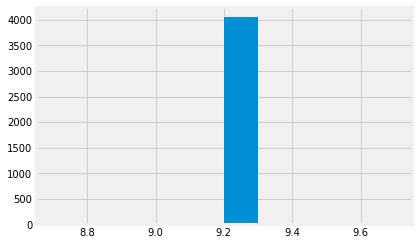

In [34]:
# Wieviel kostet die Direktverbindung Bern -- Biel (ohne Umsteigen)? 
df[(df['start'] == 'Bern') & (df['ziel'] == 'Biel/Bienne') & (df['umsteigen'] == 0)]['minimalpreis'].hist()

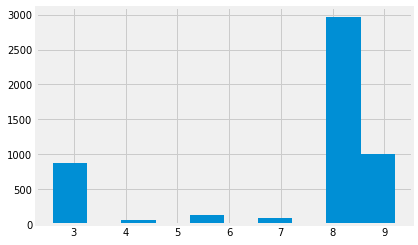

In [35]:
# Wieviel kostet die Direktverbindung Thun -- Bern (ohne Umsteigen)? 
df[(df['start'] == 'Thun') & (df['ziel'] == 'Bern') & (df['umsteigen'] == 0)]['minimalpreis'].hist()

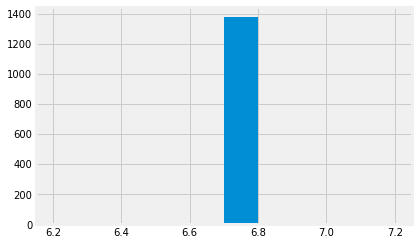

In [36]:
# Wieviel kostet die Direktverbindung Zürich -- Baden (ohne Umsteigen)? 
df[(df['start'] == 'Zürich HB') & (df['ziel'] == 'Baden') & (df['umsteigen'] == 0)]['minimalpreis'].hist()

In [37]:
# Wie verändert sich der Durchschnittspreis für eine Fahrt im Lauf des Monats vor dem Fahrtantritt?
df.groupby(by='im_voraus_kat')['minimalpreis'].mean()

im_voraus_kat
-58    17.380229
-30    17.672957
-14    18.005400
-7     18.193551
-3     18.886416
-1     19.799861
Name: minimalpreis, dtype: float64

array([ -1, -58, -14, -30,  -7,  -3, -13,  -6,   0,  -2, -29, -57])

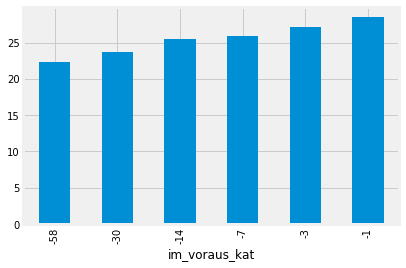

In [38]:
# Wie verändert sich der Durchschnittspreis für eine Fahrt von Genf nach Zürich im Lauf des Monats vor dem Fahrtantritt?
df_temp = df[(df['start'] == 'Genève') & (df['ziel'] == 'Zürich HB')]
df_temp.groupby(by='im_voraus_kat')['minimalpreis'].mean().plot(kind='bar')
df_temp['im_voraus'].unique()

array([-14,  -1, -13, -30, -58,  -3,  -7,  -6, -29, -57,   0,  -2])

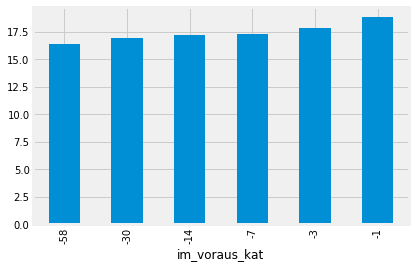

In [39]:
# Wie verändert sich der Durchschnittspreis für eine Fahrt von Bern nach Zürich im Lauf des Monats vor dem Fahrtantritt?
df_temp = df[(df['start'] == 'Bern') & (df['ziel'] == 'Zürich HB')]
df_temp.groupby(by='im_voraus_kat')['minimalpreis'].mean().plot(kind='bar')
df_temp['im_voraus'].unique()

array([ -3, -14,  -6,  -1,  -2,  -7, -30, -58, -13,   0, -29, -57])

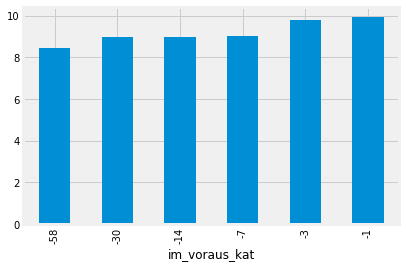

In [40]:
# Wie verändert sich der Durchschnittspreis für eine Fahrt von Basel nach Zürich im Lauf des Monats vor dem Fahrtantritt?
df_temp = df[(df['start'] == 'Basel SBB') & (df['ziel'] == 'Zürich HB')]
df_temp.groupby(by='im_voraus_kat')['minimalpreis'].mean().plot(kind='bar')
df_temp['im_voraus'].unique()

In [41]:
df['strecke'].value_counts().head(10).index

Index(['Bern -- Zürich HB', 'Basel SBB -- Zürich HB', 'Zürich HB -- Bern',
       'Genève -- Zürich HB', 'Chur -- Zürich HB', 'Bern -- Genève',
       'Baden -- Zürich HB', 'Zürich HB -- Basel SBB', 'Zürich HB -- Genève',
       'Bern -- Basel SBB'],
      dtype='object')

In [42]:
# Export für Datawrapper: Wie verändern sich die Ticketpreise auf ausgewählten Strecken im Laufe der Zeit? 
# Wie verändert sich der Durchschnittspreis für eine Fahrt von Basel nach Zürich im Lauf des Monats vor dem Fahrtantritt?

s_dict = dict()
for s in ['Bern -- Zürich HB', 'Basel SBB -- Zürich HB', 'Genève -- Zürich HB', 'Chur -- Zürich HB', 'Bern -- Genève', 'Bern -- Basel SBB']:
    df_temp = df[df['strecke'] == s]
    s_dict[s] = df_temp.groupby(by='im_voraus_kat')['minimalpreis'].mean()

df_temp = pd.DataFrame.from_dict(s_dict, orient='index')
df_temp

,-58,-30,-14,-7,-3,-1
Bern -- Zürich HB,16.361109,16.885597,17.209847,17.265706,17.795339,18.828237
Basel SBB -- Zürich HB,8.441989,8.998890,8.966282,9.010892,9.818089,9.940494
Genève -- Zürich HB,22.283920,23.641443,25.447030,25.926202,27.104553,28.528323
Chur -- Zürich HB,12.028608,12.119307,12.662427,12.587376,12.804077,13.256343
Bern -- Genève,15.778033,14.300274,14.322860,14.641580,16.013670,17.818335
Bern -- Basel SBB,10.571383,11.474841,11.387526,11.597376,12.307676,13.046296


In [43]:
df[df['strecke'] == 'Zürich HB -- Bern']['dauer'].unique()

array(['1 h 6 min', '1 h 8 min', '1 h 15 min', '1 h 34 min', '1 h 2 min',
       '1 h 26 min', '1 h 7 min', '1 h 39 min', '1 h 5 min', '1 h 22 min',
       '1 h 19 min', '1 h 20 min', '1 h 21 min', '1 h 45 min',
       '1 h 30 min', '1 h 32 min', '56 min', '1 h 28 min', '1 h 13 min',
       '1 h 9 min', '1 h 1 min', '5 h 16 min', '3 h 52 min', '2 h 30 min',
       '1 h 24 min', '5 h 51 min', '6 h 16 min', '2 h 55 min',
       '6 h 19 min', '1 h 41 min', '4 h 52 min', '1 h 18 min',
       '5 h 45 min', '1 h 27 min', '6 h 22 min', '1 h 29 min',
       '1 h 43 min', '1 h 51 min'], dtype=object)

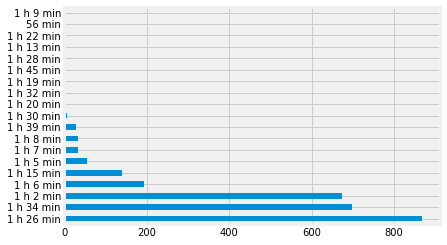

In [44]:
df_temp = df[df['sparticket'] == True]
df_temp = df_temp[df_temp['strecke'] == 'Zürich HB -- Bern']
df_temp = df_temp[df_temp['umsteigen'] == 0]
df_temp['dauer'].value_counts().plot(kind='barh')

In [45]:
# Zu welchen Zeiten werden Spartickets angeboten?
df_temp = df[df['sparticket'] == True]
df_temp = df_temp[df_temp['strecke'] == 'Bern -- Zürich HB']
df_temp = df_temp[df_temp['umsteigen'] == 0]
#df_temp = df_temp[df_temp['dauer'] == '56 min']
df_temp = df_temp[df_temp['im_voraus_kat'] == -3]
df_temp.index = pd.to_datetime(df_temp['abfahrt_datetime'])
df_temp = df_temp.groupby(df_temp.index.hour)[['sparticket']].count()

# Da zu unterschiedlichen Zeiten nicht gleichviele Tickets zur Verfügung stehen, müssen die Daten normalisiert werden. 
df_temp2 = df
df_temp2 = df_temp2[df_temp2['strecke'] == 'Bern -- Zürich HB']
df_temp2 = df_temp2[df_temp2['umsteigen'] == 0]
#df_temp2 = df_temp2[df_temp2['dauer'] == '56 min']
df_temp2 = df_temp2[df_temp2['im_voraus_kat'] == -3]
df_temp2.index = pd.to_datetime(df_temp2['abfahrt_datetime'])
df_temp2 = df_temp2.groupby(df_temp2.index.hour)[['minimalpreis']].count()
df_temp = pd.concat([df_temp, df_temp2], axis=1)
df_temp.columns = ['anz_spartickets', 'anz_tickets']
df_temp['prozent'] = round(100 * df_temp['anz_spartickets'] / df_temp['anz_tickets'], 2)
df_temp[['prozent']]

,prozent
abfahrt_datetime,
0,78.26
1,50.00
4,100.00
5,83.67
6,57.80
7,20.00
8,57.27
9,21.09
10,100.00


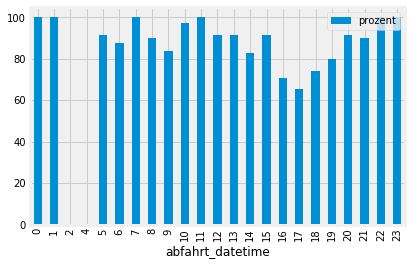

In [46]:
# Zu welchen Zeiten werden Spartickets angeboten?
df_temp = df[df['sparticket'] == True]
df_temp = df_temp[df_temp['strecke'] == 'Zürich HB -- Bern']
df_temp = df_temp[df_temp['im_voraus_kat'] == -58]
df_temp.index = pd.to_datetime(df_temp['abfahrt_datetime'])
df_temp = df_temp.groupby(df_temp.index.hour)[['sparticket']].count()

# Da zu unterschiedlichen Zeiten nicht gleichviele Tickets zur Verfügung stehen, müssen die Daten normalisiert werden. 
df_temp2 = df
df_temp2 = df_temp2[df_temp2['strecke'] == 'Zürich HB -- Bern']
df_temp2 = df_temp2[df_temp2['im_voraus_kat'] == -58]
df_temp2.index = pd.to_datetime(df_temp2['abfahrt_datetime'])
df_temp2 = df_temp2.groupby(df_temp2.index.hour)[['minimalpreis']].count()
df_temp = pd.concat([df_temp, df_temp2], axis=1)
df_temp.columns = ['anz_spartickets', 'anz_tickets']
df_temp['prozent'] = round(100 * df_temp['anz_spartickets'] / df_temp['anz_tickets'], 2)
df_temp[['prozent']].plot(kind='bar')

In [47]:
# Kann man Geld sparen, wenn man Routen mit mehr Zugswechsel (umsteigen) in Kauf nimmt? 
# Durchschnittspreise pro Strecke und Anzahl Zugswechsel.
temp_dict = dict()

for s in progressbar(df['strecke'].unique()):
    p = df[df['strecke'] == s].groupby(by='umsteigen')['minimalpreis'].mean()
    temp_dict[s] = p
    
df_preise = pd.DataFrame.from_dict(temp_dict, orient='index')
df_preise = df_preise[sorted(df_preise.columns)]
df_preise.to_excel('output/preise_umsteigen.xlsx')
df_preise

100% (195 of 195) |######################| Elapsed Time: 0:00:01 Time:  0:00:01


,0,1,2,3,4,5,6,7,8
"Bern -- Lugano, Vignola",NaN,NaN,NaN,48.954641,48.846951,46.975535,48.0,NaN,NaN
"Zürich HB -- Lugano, Vignola",NaN,NaN,36.600000,36.600000,NaN,NaN,NaN,NaN,NaN
Zürich HB -- Bern,16.151977,14.199960,14.720323,28.056667,39.892308,NaN,NaN,NaN,NaN
Genève -- Bern,12.062605,17.237643,20.773750,27.847826,25.600000,NaN,NaN,NaN,NaN
Genève -- Zürich HB,25.220632,28.006278,20.831250,40.272727,44.625000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
"Zürich HB -- Winterthur, Hinterwiesli",NaN,6.736000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Biel/Bienne -- Bern, Wankdorf Center",NaN,9.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Zürich HB -- Winterthur, Turmstrasse",NaN,6.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zürich HB -- Bern Bümpliz Nord,NaN,25.130000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Wo bezahlt man -- obwohl man einmal umsteigen in Kauf nimmt -- trotzdem viel mehr? 
df_umsteigen = df_preise[[0,1]].dropna()
df_umsteigen['diff'] = round(df_umsteigen[0] - df_umsteigen[1], 4)
df_umsteigen.sort_values(by='diff')

,0,1,diff
"Genève -- Zürich, Lugano Bar",29.700000,48.971429,-19.2714
"Genève -- Zürich, Churchill",29.150000,44.000000,-14.8500
Biel/Bienne -- Zürich HB,16.338090,24.416094,-8.0780
Zürich HB -- Biel/Bienne,16.179823,23.926864,-7.7470
Baden -- Zürich HB,6.700000,12.900000,-6.2000
Biel/Bienne -- Bern,9.200000,15.388235,-6.1882
Genève -- Bern,12.062605,17.237643,-5.1750
Bern -- Genève,13.594513,18.317122,-4.7226
"Thun -- Zürich, Apotheke im Hauptbahnhof",21.980000,26.240000,-4.2600
Biel/Bienne -- Basel SBB,7.612500,10.800000,-3.1875


In [49]:
# Weshalb bezahlt man von Genf nach Zürich mehr, wenn man umsteigt? 
df[(df['start'] == 'Genève') & (df['ziel'] == 'Zürich HB')].groupby(by='umsteigen')['minimalpreis'].mean()

umsteigen
0    25.220632
1    28.006278
2    20.831250
3    40.272727
4    44.625000
Name: minimalpreis, dtype: float64

In [50]:
# Weshalb bezahlt man von Genf nach Zürich mehr, wenn man umsteigt? 
df[(df['start'] == 'Genève') & (df['ziel'] == 'Zürich HB') & (df['umsteigen'] == 1)].groupby(by='dauer')['minimalpreis'].mean()

dauer
2 h 56 min    34.320000
2 h 58 min    33.089431
3 h 1 min     16.321429
3 h 11 min    28.914286
3 h 14 min    19.360000
3 h 15 min    13.640000
3 h 17 min    13.200000
3 h 18 min    13.200000
3 h 2 min     35.200000
3 h 21 min    13.200000
3 h 24 min    16.500000
3 h 31 min    13.200000
3 h 37 min    13.200000
3 h 39 min    14.400000
3 h 5 min     28.895385
3 h 7 min     22.576471
3 h 8 min     23.414815
3 h 9 min     13.200000
6 h 57 min    31.200000
Name: minimalpreis, dtype: float64

In [51]:
# Wie viel kostet die Direktverbindung von Genf nach Zürich minimal, im Durchschnitt und maximal? 
df[(df['start'] == 'Genève') & (df['ziel'] == 'Zürich HB') & (df['umsteigen'] == 0)]['minimalpreis'].describe()

count    6524.000000
mean       25.220632
std        10.215386
min        13.200000
25%        13.200000
50%        24.200000
75%        33.000000
max        44.000000
Name: minimalpreis, dtype: float64

In [52]:
# Wie hoch ist der Kilometerpreis auf der günstigsten Fahrt von Genf nach Zürich? 
df_distanzen = pd.read_csv('daten/distanzen.csv', index_col='Unnamed: 0')
df_distanzen.set_index('strecke', drop=True, inplace=True)
dist_genf_bern_zürich = df_distanzen.loc[['Genève -- Bern', 'Bern -- Zürich HB']]['kilometer'].sum()
df[(df['start'] == 'Genève') & (df['ziel'] == 'Zürich HB') & (df['umsteigen'] == 0)]['minimalpreis'].min() / dist_genf_bern_zürich * 100

4.560089543576491

In [53]:
# Wie hoch ist der Kilometerpreis im Normaltarif? 
44 / dist_genf_bern_zürich * 100

15.200298478588307

In [54]:
# Wie viel kostet die schnellste Verbindung zwischen Genf und Zürich im Durchschnitt? 
df[(df['start'] == 'Genève') & (df['ziel'] == 'Zürich HB') & (df['dauer'] == '2 h 41 min')]['minimalpreis'].mean()

23.496593328601843

In [55]:
# Wie viel kostet die zweitschnellste Verbindung zwischen Genf und Zürich im Durchschnitt? 
df[(df['start'] == 'Genève') & (df['ziel'] == 'Zürich HB') & (df['dauer'] == '2 h 46 min')]['minimalpreis'].mean()

28.005590496156533

In [56]:
# Ist die Auslastung auf der Linie entlang des Jurasüdfuss' tiefer als jene via Bern? Hier: Via Bern. 
df[(df['start'] == 'Genève') & (df['ziel'] == 'Zürich HB') & (df['dauer'] == '2 h 46 min')]['belegung_2'].value_counts()

2. Klasse, Tiefe bis mittlere Belegung erwartet    1509
2. Klasse, Hohe Belegung erwartet                   359
2. Klasse, Sehr hohe Belegung erwartet                6
Name: belegung_2, dtype: int64

In [57]:
# Ist die Au# Ist die Auslastung auf der Linie entlang des Jurasüdfuss' tiefer als jene via Bern? Hier: Via Jurasüdfuss. 
df[(df['start'] == 'Genève') & (df['ziel'] == 'Zürich HB') & (df['dauer'] == '2 h 41 min')]['belegung_2'].value_counts()

2. Klasse, Tiefe bis mittlere Belegung erwartet    948
2. Klasse, Hohe Belegung erwartet                  875
2. Klasse, Sehr hohe Belegung erwartet              42
Name: belegung_2, dtype: int64

In [58]:
# Die Auslastung müsste mit dem Preis korrelieren. 
df.groupby(by='belegung_2')['minimalpreis'].mean()

belegung_2
2. Class, High occupancy expected                    23.388889
2. Class, Low to average occupancy expected          44.750000
2. Class, Very high occupancy expected               26.500000
2. Classe, Taux d’occupation faible à moyen prévu    37.472000
2. Classe, Taux d’occupation très élevé prévu        26.500000
2. Classe, Taux d’occupation élevé prévu             31.600000
2. Klasse, Hohe Belegung erwartet                    22.171797
2. Klasse, Sehr hohe Belegung erwartet               25.756938
2. Klasse, Tiefe bis mittlere Belegung erwartet      15.013183
Name: minimalpreis, dtype: float64

In [59]:
# Bei welchen Angeboten lag der Kilometerpreis besonders tief?
df[df['umsteigen'] == 0].sort_values(by='kilometerpreis', ascending=True).head(100)[['datum', 'start', 'ziel', 'abfahrt', 'umsteigen', 'im_voraus', 'minimalpreis', 'kilometerpreis', 'normalpreis']]

,datum,start,ziel,abfahrt,umsteigen,im_voraus,minimalpreis,kilometerpreis,normalpreis
13731,2019-12-30,Genève,Bern,08:42,0,-58,7.8,4.5676,25.5
14123,2019-11-30,Genève,Bern,16:00,0,-30,7.8,4.5676,25.5
14117,2019-11-07,Genève,Bern,15:00,0,-3,7.8,4.5676,25.5
14116,2019-11-07,Genève,Bern,14:42,0,-3,7.8,4.5676,25.5
14115,2019-11-07,Genève,Bern,14:00,0,-3,7.8,4.5676,25.5
...,...,...,...,...,...,...,...,...,...
14052,2019-11-15,Genève,Bern,11:42,0,-14,7.8,4.5676,25.5
14051,2019-11-15,Genève,Bern,11:00,0,-14,7.8,4.5676,25.5
14050,2019-11-15,Genève,Bern,10:42,0,-14,7.8,4.5676,25.5
14046,2019-11-15,Genève,Bern,08:42,0,-14,7.8,4.5676,25.5
